# Exploring San Francisco Bay Area Bike-Sharing System - Ford GoBike

## Investigation Overview

> The overall goals of your presentation is to analyze the bike usage by day of week and over months of 2018 for different types of users, as well as the duration and frequency of customers and subscribers

## Dataset Overview

> The dataset was downloaded from the Ford GoBike website, a collective file for 2017 Bay Area bike-sharing system data with 519700 records of individual trips. I will compare the bike sharing usage between different time range, user type, gender, age and location to find out their relationship with trip duration.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import glob
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df = pd.concat([pd.read_csv(f) for f in glob.glob('*.csv')], ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


## (Visualization 1)

> There are a consistent growth in the number of rides over the months with summer reaching the peak.In addition, there's a large increase in the number of rides from April to May. The trend started to go down from Aug for Customer/Casual user, but still stayed strong for subscriber and continue into November 2018.

> Subscriber used the bike-sharing system more frequently than customer users.

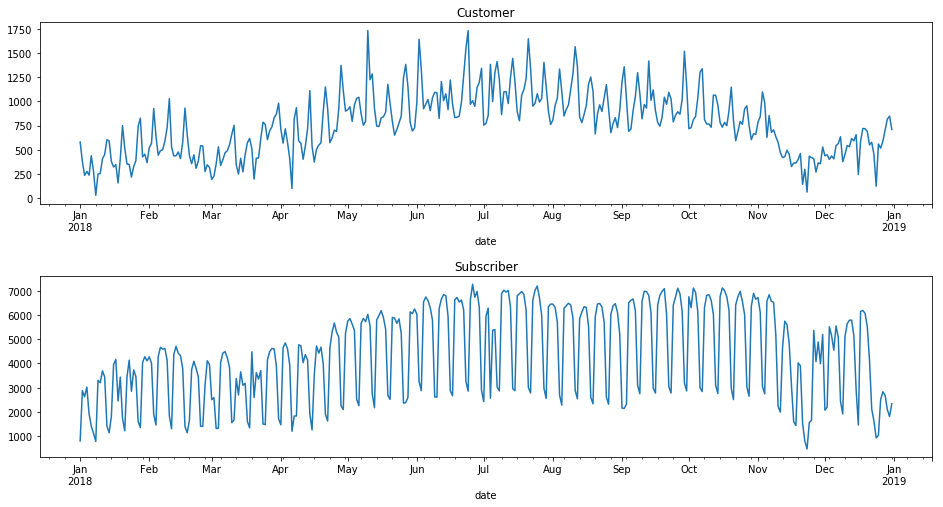

In [9]:
ind = pd.DatetimeIndex(df.start_time)
df['date'] = ind.date.astype('datetime64')
df['hour'] = ind.hour
df['dayofweek']=ind.dayofweek
by_date = df.pivot_table(aggfunc='count',
                            index='date',
                            columns='user_type')
fig, ax = plt.subplots(2, figsize=(16, 8))
fig.subplots_adjust(hspace=0.4)
by_date.iloc[:, 0].plot(ax=ax[0], title='Customer');
by_date.iloc[:, 1].plot(ax=ax[1], title='Subscriber');



## (Visualization 2)

> Customers' usage increased dramatically over the weekend,which is opposite to the subscribers whose usage over weekdays is greater than over weekend.

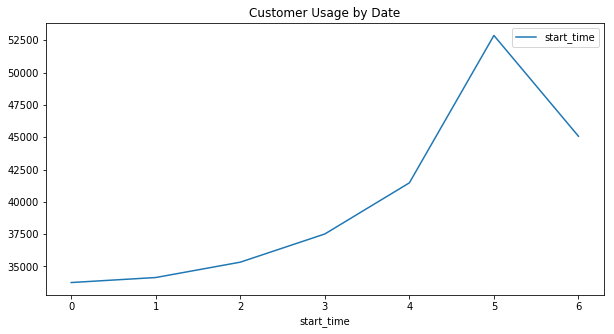

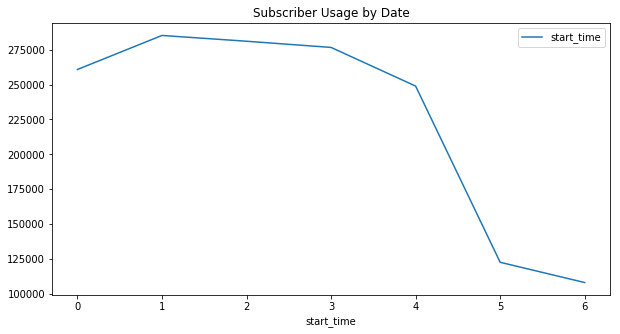

In [20]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_time_month'] = df['start_time'].dt.month
df['start_time_day_of_week'] = df['start_time'].dt.weekday_name
df['start_time_hour'] = df['start_time'].dt.hour
df['duration_min'] = df['duration_sec']/60
customer_usage_week = df.groupby(df[df["user_type"] == "Customer"]['start_time'].dt.dayofweek).count()
Subscriber_usage_week = df.groupby(df[df["user_type"] == "Subscriber"]['start_time'].dt.dayofweek).count()
customer_usage_week.plot.line(x=customer_usage_week.index,y = "start_time", figsize = [10,5], title='Customer Usage by Date')
Subscriber_usage_week.plot.line(x=Subscriber_usage_week.index,y = "start_time",figsize = [10,5], title='Subscriber Usage by Date')

## (Visualization 3)
> Subsribers with 8 mins ride has the highest frequency, while customers have longer ride duration but lower frequency.


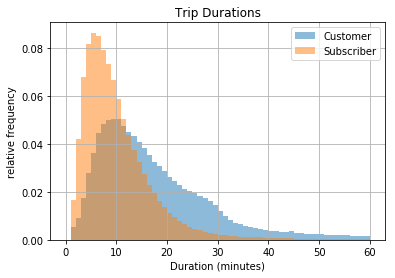

In [22]:
df.groupby('user_type')['duration_min'].hist(bins=np.arange(61), alpha=0.5, normed=True);
plt.xlabel('Duration (minutes)')
plt.ylabel('relative frequency')
plt.title('Trip Durations')
plt.legend(['Customer', 'Subscriber'])